In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.model_selection import cross_val_score

In [7]:
from sklearn.svm import SVC

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
iris_data=pd.read_csv('Iris.csv')

**Data Visulaization and Preprocessing**

In [12]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
iris_data.shape

(150, 5)

In [14]:
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [15]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
sns.set(style="darkgrid")

<Figure size 500x500 with 0 Axes>

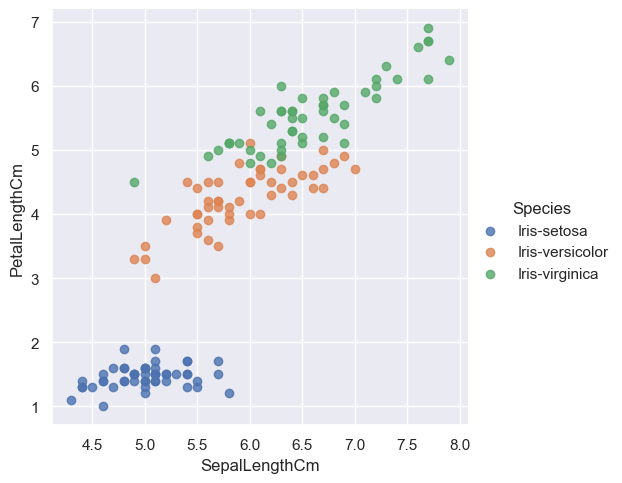

In [19]:
plt.figure(figsize=(5,5))
sns.lmplot(x='SepalLengthCm',y='PetalLengthCm',fit_reg=False,hue='Species',data=iris_data)
plt.show()

<Figure size 500x500 with 0 Axes>

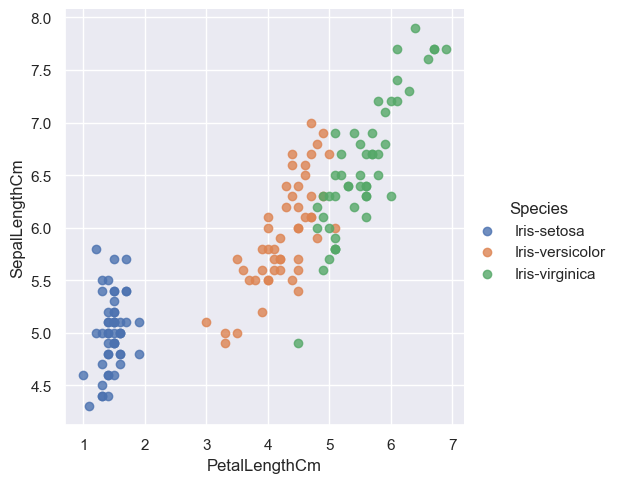

In [20]:
plt.figure(figsize=(5,5))
sns.lmplot(x='PetalLengthCm',y='SepalLengthCm',fit_reg=False,hue='Species',data=iris_data)
plt.show()

<Figure size 500x500 with 0 Axes>

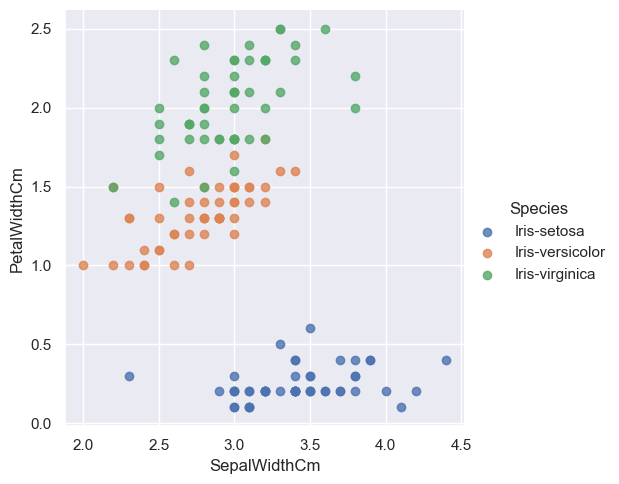

In [21]:
plt.figure(figsize=(5,5))
sns.lmplot(x='SepalWidthCm',y='PetalWidthCm',fit_reg=False,hue='Species',data=iris_data)
plt.show()

<Figure size 500x500 with 0 Axes>

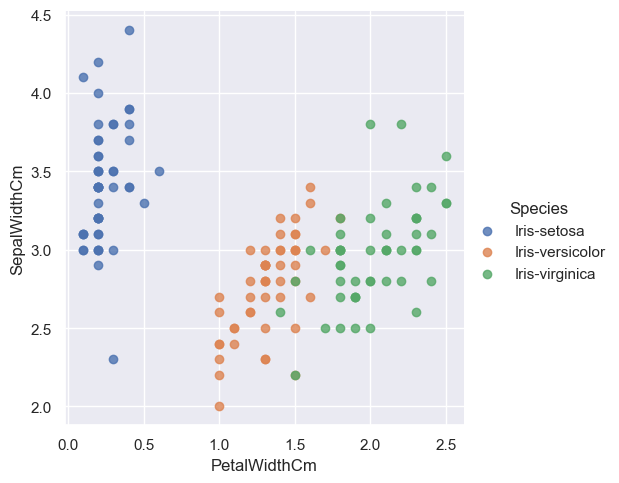

In [22]:
plt.figure(figsize=(5,5))
sns.lmplot(x='PetalWidthCm',y='SepalWidthCm',fit_reg=False,hue='Species',data=iris_data)
plt.show()

<Figure size 1300x1300 with 0 Axes>

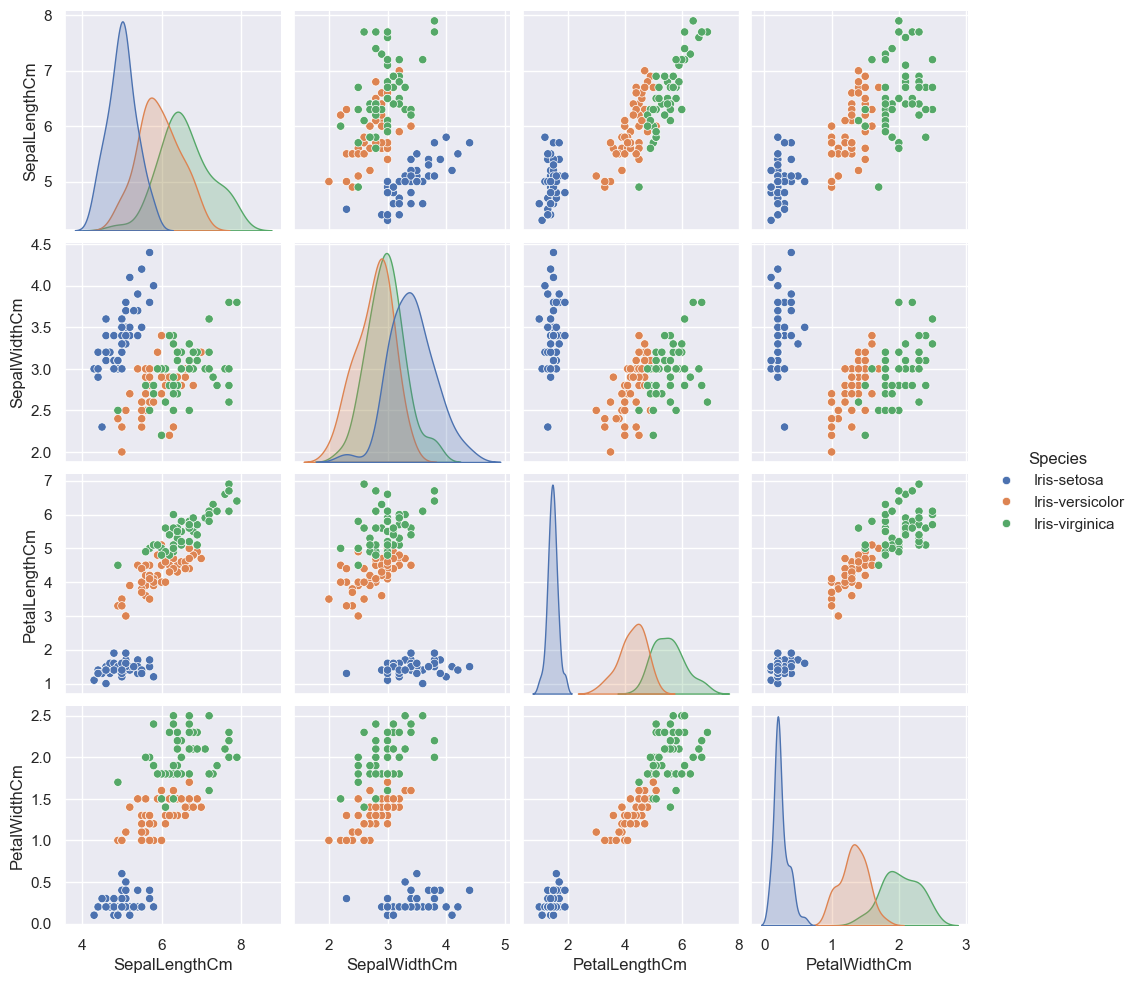

In [23]:
plt.figure(figsize=(13,13))
sns.pairplot(iris_data,kind='scatter',hue='Species')
plt.show()

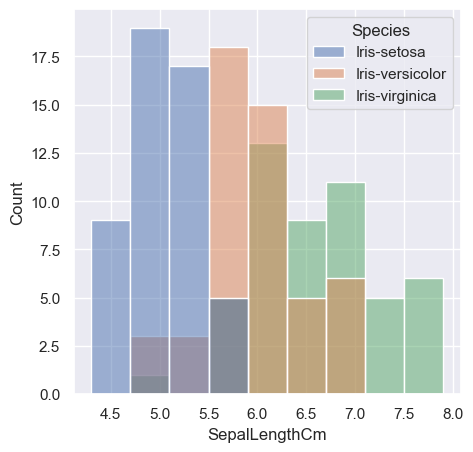

In [24]:
plt.figure(figsize=(5,5))
sns.histplot(x='SepalLengthCm',data=iris_data,hue='Species')
plt.show()

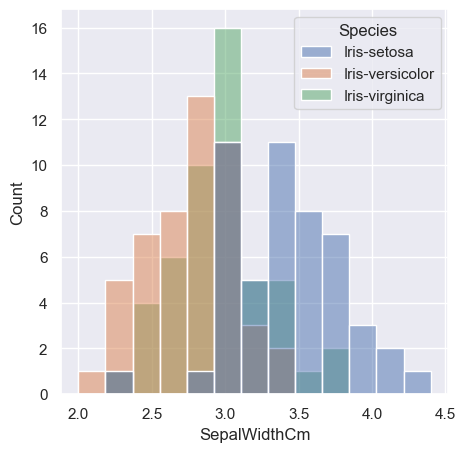

In [25]:
plt.figure(figsize=(5,5))
sns.histplot(x='SepalWidthCm',data=iris_data,hue='Species')
plt.show()

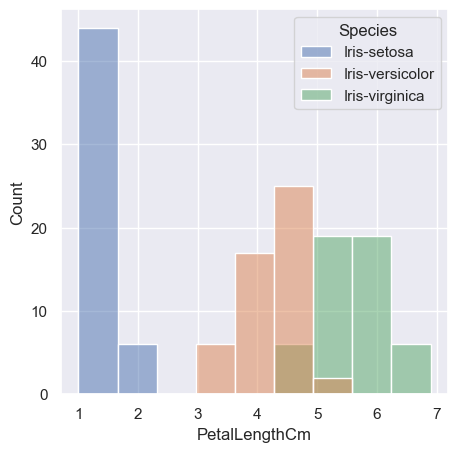

In [26]:
plt.figure(figsize=(5,5))
sns.histplot(x='PetalLengthCm',data=iris_data,hue='Species')
plt.show()

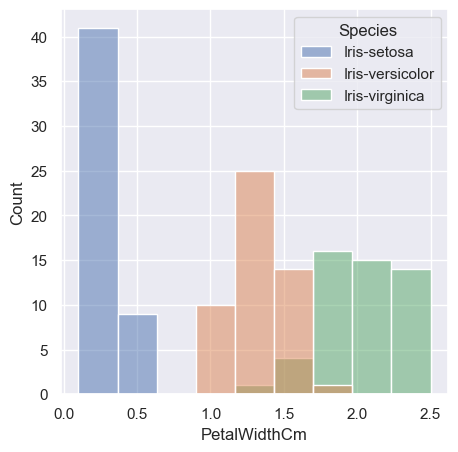

In [27]:
plt.figure(figsize=(5,5))
sns.histplot(x='PetalWidthCm',data=iris_data,hue='Species')
plt.show()

In [28]:
new_data=iris_data.drop(columns='Species',axis=1)

In [29]:
new_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
correlation=new_data.corr()

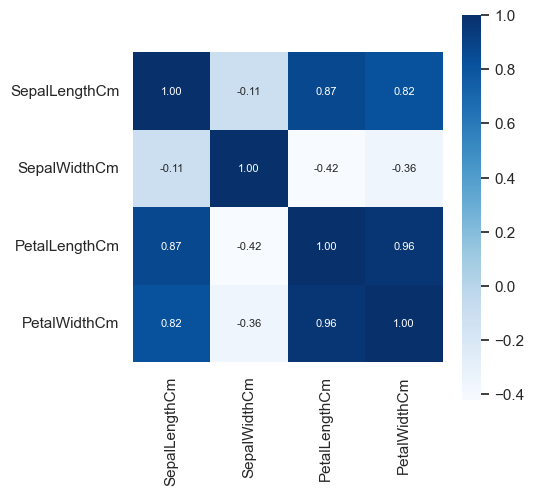

In [31]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Blues')
plt.show()

**ModelSelection**

In [32]:
X=iris_data.drop(columns='Species',axis=1)

In [33]:
Y=iris_data['Species']

In [34]:
models=[LogisticRegression(max_iter=1000),SVC(),KNeighborsClassifier(),RandomForestClassifier(random_state=0)]

In [35]:
model_hyperparameters={
    'log_reg_hyperparameters':{
        'C':[1,5,10,20]
    },
    'svc_hyperparameters':{
        'kernel':['linear','poly','rbf','sigmoid'],
        'C':[1,5,10,20]
    },
    'knn_hyperparameters':{
        'n_neighbors':[1,3,5,10]
    },
    'randomforest_hyperparameters':{
        'n_estimators':[10,20,50,100]
    }
}

In [36]:
model_keys=list(model_hyperparameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'svc_hyperparameters', 'knn_hyperparameters', 'randomforest_hyperparameters']


In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
def Modelselection(models,model_hyperparameters):
    result = []
    i = 0
    for model in models:
        key = model_keys[i]
        params = model_hyperparameters[model_keys[i]]
        i += 1
        print(model)
        print(params)
        classifier = GridSearchCV(model, params, cv=5)
        classifier.fit(X, Y)
        result.append({
            'model_used': model,
            'highest_score': classifier.best_score_,
            'best_hyperparameters': classifier.best_params_
        })
    result_dataframe = pd.DataFrame(result, columns=['model_used', 'highest_score', 'best_hyperparameters'])
    return result_dataframe

In [39]:
Modelselection(models,model_hyperparameters)

LogisticRegression(max_iter=1000)
{'C': [1, 5, 10, 20]}
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
KNeighborsClassifier()
{'n_neighbors': [1, 3, 5, 10]}
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}


,model_used,highest_score,best_hyperparameters
0,LogisticRegression(max_iter=1000),0.980000,{'C': 20}
1,SVC(),0.986667,"{'C': 5, 'kernel': 'rbf'}"
2,KNeighborsClassifier(),0.980000,{'n_neighbors': 10}
3,RandomForestClassifier(random_state=0),0.966667,{'n_estimators': 100}


The best model for the IRIS data classification is Support Vector Classifier 

**ModelTraining**

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()

In [42]:
scaler.fit(X)

StandardScaler()

In [43]:
X=scaler.transform(X)

In [44]:
print(X)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [45]:
print(Y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [46]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=0)

In [47]:
model=SVC(kernel='rbf',C=5)

In [48]:
model.fit(train_x,train_y)

SVC(C=5)

In [49]:
train_x_prediction=model.predict(train_x)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [51]:
train_x_accuracy=accuracy_score(train_y,train_x_prediction)

In [52]:
print(train_x_accuracy)

0.9583333333333334


In [53]:
test_x_prediction=model.predict(test_x)

In [54]:
test_x_accuracy=accuracy_score(test_y,test_x_prediction)

In [55]:
print(test_x_accuracy)

1.0


In [56]:
cf_matrix=confusion_matrix(test_y,test_x_prediction)

In [57]:
print(cf_matrix)

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


Text(0.5, 20.049999999999997, 'Predicted Labels')

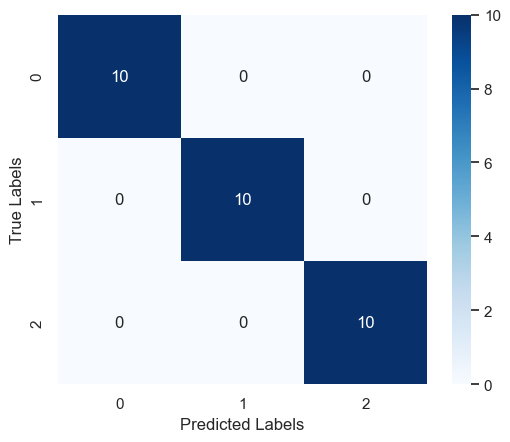

In [58]:
sns.heatmap(cf_matrix,annot=True,cbar=True,square=True,cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Predictive Modeling**

In [59]:
test_x=pd.DataFrame(test_x)

In [60]:
print(test_x)

           0         1         2         3
0  -0.416010  1.032057 -1.398138 -1.312977
1  -0.173674 -0.587764  0.421564  0.133226
2  -0.900681  1.726266 -1.056944 -1.050031
3   0.310998 -1.050569  1.047087  0.264699
4  -0.900681  0.800654 -1.284407 -1.312977
5  -0.416010 -1.050569  0.364699  0.001753
6   0.795669 -0.124958  0.819624  1.053537
7  -1.506521  0.337848 -1.341272 -1.312977
8  -1.506521  0.106445 -1.284407 -1.312977
9  -0.416010 -1.513375 -0.033361 -0.261193
10  0.553333  0.800654  1.047087  1.579429
11 -0.294842 -0.124958  0.194102  0.133226
12  0.795669 -0.587764  0.478430  0.396172
13  1.280340  0.106445  0.933356  1.185010
14 -0.052506 -0.819166  0.194102 -0.261193
15 -0.052506 -0.819166  0.762759  0.922064
16 -0.173674 -1.281972  0.705893  1.053537
17  1.038005  0.106445  0.364699  0.264699
18  1.401508  0.337848  0.535296  0.264699
19 -0.900681  1.726266 -1.227541 -1.312977
20 -0.900681  1.726266 -1.284407 -1.181504
21 -0.294842 -0.587764  0.649027  1.053537
22  0.55333

In [61]:
input_data=test_x.iloc[20]

In [62]:
nparray=np.asarray(input_data)

In [63]:
reshaped=nparray.reshape(1,-1)

In [64]:
input_data_df=pd.DataFrame(reshaped)

In [65]:
prediction=model.predict(input_data_df)

In [66]:
print(prediction)

['Iris-setosa']


In [67]:
test_y=pd.DataFrame(test_y)

In [68]:
print(test_y)

             Species
36       Iris-setosa
55   Iris-versicolor
44       Iris-setosa
134   Iris-virginica
39       Iris-setosa
90   Iris-versicolor
147   Iris-virginica
47       Iris-setosa
3        Iris-setosa
81   Iris-versicolor
136   Iris-virginica
88   Iris-versicolor
54   Iris-versicolor
139   Iris-virginica
67   Iris-versicolor
142   Iris-virginica
113   Iris-virginica
65   Iris-versicolor
50   Iris-versicolor
46       Iris-setosa
19       Iris-setosa
121   Iris-virginica
103   Iris-virginica
129   Iris-virginica
21       Iris-setosa
86   Iris-versicolor
99   Iris-versicolor
100   Iris-virginica
0        Iris-setosa
9        Iris-setosa


In [69]:
test_y.iloc[20]

Species    Iris-setosa
Name: 19, dtype: object

In [70]:
input_data=test_x.iloc[6]

In [71]:
nparray=np.asarray(input_data)

In [72]:
reshaped1=nparray.reshape(1,-1)

In [73]:
input_data_df1=pd.DataFrame(reshaped1)

In [74]:
predcition2=model.predict(input_data_df1)

In [75]:
print(predcition2)

['Iris-virginica']


In [76]:
print(test_y.iloc[6])

Species    Iris-virginica
Name: 147, dtype: object


In [77]:
input_data=test_x.iloc[25]

In [78]:
nparray=np.asarray(input_data)

In [79]:
reshaped=nparray.reshape(1,-1)

In [80]:
input_df2=pd.DataFrame(reshaped)

In [81]:
prediction2=model.predict(input_df2)

In [82]:
print(prediction2)

['Iris-versicolor']


In [83]:
print(test_y.iloc[25])

Species    Iris-versicolor
Name: 86, dtype: object


In [84]:
input_data=test_x.iloc[29]

In [85]:
nparray=np.asarray(input_data)

In [86]:
reshaped=nparray.reshape(1,-1)

In [87]:
input_df3=pd.DataFrame(reshaped)

In [88]:
prediction3=model.predict(input_df3)

In [89]:
print(prediction3)

['Iris-setosa']


In [90]:
print(test_y.iloc[29])

Species    Iris-setosa
Name: 9, dtype: object
